# SVM

## 載入套件

In [137]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# 顯示所有列
pd.set_option('display.max_columns', None)
# 顯示所有行
pd.set_option('display.max_rows', None)

%matplotlib inline

preprocess_status = '_under_median'

## read train dataset

In [139]:
df_tr = pd.read_excel("./preprocess/output_tr" + preprocess_status + ".xlsx", engine='openpyxl')
# df = pd.read_csv("final/tr.csv")
df_tr.head(3)

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,Blood_trans,OP_time_hour,ASA,CBC_WBC,CBC_RBC,CBC_HG,CBC_HT,CBC_MCV,CBC_MCH,CBC_MCHC,CBC_RDW,CBC_Platelet,CBC_RDWCV,BUN,Crea,GOT,GPT,ALB,Na,K,UA,Diagnosis,Congestive Heart Failure,Cardiac Arrhythmia,Valvular Disease,Heart disease,Pulmonary Circulation Disorders,Peripheral Vascular Disorders,Hypertension Uncomplicated,Paralysis,Other Neurological Disorders,Chronic Pulmonary Disease,Lung disease,Diabetes,Hypothyroidism,Renal Failure,Liver Disease,Peptic Ulcer Disease excluding bleeding,AIDS/HIV,Lymphoma,Metastatic Cancer,Solid Tumor without Metastasis,Cancer history,Rheumatoid Arthritis/collagen,Coagulopathy,Obesity,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,outcome
0,1,0,0.26,0,0,0,0,0,0,0,0,2.01,2,1.49,-2.17,-1.05,-1.20,0.29,0.56,0.90,-0.25,0.48,-0.09,3.83,1.33,1.41,0.12,0.11,-0.61,0.72,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-0.27,0,0,0,0,0,0,0,0,2.45,3,-0.25,-0.07,0.29,0.20,0.04,0.05,0.06,-0.29,-0.08,-0.09,-0.13,0.22,-0.56,-0.26,0.37,0.22,0.26,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1,0,-0.05,0,0,0,0,0,1,1,0,2.33,2,-0.24,-0.09,0.26,0.16,0.05,0.07,0.10,-0.29,-0.11,-0.09,-0.13,0.24,-0.57,-0.28,0.36,0.20,0.26,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## read test dataset

In [18]:
df_ts = pd.read_excel("ts.xlsx", engine='openpyxl')
# df = pd.read_csv("final/ts.csv")
df_ts.head(3)

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder
0,81.0,M,3.0,TKA,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,F,3.0,THA,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,54.0,F,6.0,TKA,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## 將資料分成訓練組及測試組

In [140]:
X = df_tr.drop('outcome', 1)
y = df_tr['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

## SVM

In [141]:
# 平均值和標準差
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [302]:
# 使用Support Vector Classifier來建立模型
svm = SVC(C=8, kernel='linear', gamma='scale') # SVC(kernel='rbf',C=1,gamma='auto')

In [304]:
# 使用Support Vector Classifier來建立模型
svm.fit(X_train,y_train)

SVC(C=8, kernel='linear')

## Evaluate

In [305]:
# 利用測試組資料來測試模型結果
predictions = svm.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [306]:
print(svm.score(X_train,y_train))
print(svm.score(X_test, y_test))

0.9892318736539842
0.9770773638968482


In [307]:
#載入classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
confu_matrix = confusion_matrix(y_test,predictions)
print(confu_matrix)
print('\n')
print(classification_report(y_test,predictions))

[[168   5]
 [  3 173]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       173
           1       0.97      0.98      0.98       176

    accuracy                           0.98       349
   macro avg       0.98      0.98      0.98       349
weighted avg       0.98      0.98      0.98       349



In [308]:
import math


#      |  (a)  |  (b)  |
# --------------------------
# (a)  |  TP   |  FN   |
# --------------------------
# (b)  |  FP   |  TN   |

tp = confu_matrix[0, 0]
fp = confu_matrix[0, 1]
fn = confu_matrix[1, 0]
tn = confu_matrix[1, 1]

acc = (tp + tn) / (tp + fp + tn + fn)
f1 = (2 * tp) / (2 * tp + fp + fn)
ppv = (tp) / (tp + fp)
recall = (tp) / (tp + fn)
mcc = ((tp * tn) - (fp * fn)) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))

tpr = tp / (tp + fn)
fpr = fp / (fp + tn) 
auc = 1/2 - fpr/2 + tpr/2


print('acc: ', acc)
print('f1: ', f1)
print('ppv: ', ppv)
print('recall: ', recall)
print('mcc: ', mcc)
print('auc: ', auc)

acc:  0.9770773638968482
f1:  0.9767441860465116
ppv:  0.9710982658959537
recall:  0.9824561403508771
mcc:  0.9542095191604538
auc:  0.9771831263552139


In [112]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,predictions)
print('fpr_keras: ', fpr_keras)
print('tpr_keras: ', tpr_keras)
print('thresholds_keras: ', thresholds_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

fpr_keras:  [0. 1.]
tpr_keras:  [0. 1.]
thresholds_keras:  [1 0]


0.5

In [313]:
import pickle
# save the model to disk
filename = './model/svm/finalized_model_best_' + preprocess_status + '.sav'
pickle.dump(svm, open(filename, 'wb'))

## 尋找最佳參數

In [15]:
#結果發現，分類結果都只出現在特定的類別，所以要修正模型。剛在跑model.fit(X_train,y_train)時，有看到輸出結果中有許多參數可以修改，像是C及gamma值。由於要選到適合的C值及gamma值，有好幾種排列組合，這時候就可以使用格狀組合的參數來找到最佳結果的Gridsearch。

In [16]:
#載入GridSearchCV
from sklearn.model_selection import GridSearchCV

In [255]:
#GridSearchCV是建立一個dictionary來組合要測試的參數
param_grid = {'C':[0.1,1,8,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001,'scale','auto'],'kernel':['linear','rbf','sigmoid','poly ']}

In [256]:
#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC。重點是會創造一個新的estimator，但又表現得一模一樣，也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [263]:
#利用剛剛設定的參數來找到最適合的模型
grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.964, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.545, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.527, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.543, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.276, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.280, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.771, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.781, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.810, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.813, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.781, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.591, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.527, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.946, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.907, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.900, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.903, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.899, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.939, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.889, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.613, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.599, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.620, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.655, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.655, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=0.001, kernel=sigmoid, score=0.602, total=   0.1s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.502, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.502, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.502, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=0.1, gamma=0.0001, kernel=sigmoid, score=0.502, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=0.1, gamma=0.0001, kernel=sigmoid, score=0.502, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.939, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.907, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.903, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.914, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.899, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=scale, kernel=sigmoid, score=0.946, total=   0.1s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ...... C=0.1, gamma=scale, kernel=poly , score=nan, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly  ................................
[CV] ...... C=0.1, gamma=scale, kernel=poly , score=nan, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly  ................................
[CV] ...... C=0.1, gamma=scale, kernel=poly , score=nan, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.964, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ............ C=1, gamma=1, kernel=rbf, score=0.685, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.688, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.703, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.676, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.676, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.269, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.276, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ............ C=1, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=poly  ......................................
[CV] ............ C=1, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=poly  ......................................
[CV] ............ C=1, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.975, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.961, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.975, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.986, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.968, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.975, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.982, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.971, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.889, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.900, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.961, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.935, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.953, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.950, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.935, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.943, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.900, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.645, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.616, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.649, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.683, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.687, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.541, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.538, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ....... C=1, gamma=0.0001, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly  .................................
[CV] ....... C=1, gamma=0.0001, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly  .................................
[CV] ....... C=1, gamma=0.0001, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly  .................................
[CV] ....... C=1, gamma=0.0001, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly  .................................
[CV] ....... C=1, gamma=0.0001, kernel=poly , score=nan, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.975, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.961, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.986, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.964, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.982, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.964, total=   0.0s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ......... C=8, gamma=1, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.960, total=   0.1s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=1, kernel=rbf ........................................
[CV] ............ C=8, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=8, gamma=1, kernel=rbf ........................................
[CV] ............ C=8, gamma=1, kernel=rbf, score=0.692, total=   0.1s
[CV] C=8, gamma=1, kernel=rbf ........................................
[CV] ............ C=8, gamma=1, kernel=rbf, score=0.710, total=   0.1s
[CV] C=8, gamma=1, kernel=rbf ........................................
[CV] ............ C=8, gamma=1, kernel=rbf, score=0.694, total=   0.1s
[CV] C=8, gamma=1, kernel=rbf ........................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ............ C=8, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=8, gamma=1, kernel=poly  ......................................
[CV] ............ C=8, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=8, gamma=1, kernel=poly  ......................................
[CV] ............ C=8, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=8, gamma=1, kernel=poly  ......................................
[CV] ............ C=8, gamma=1, kernel=poly , score=nan, total=   0.0s
[CV] C=8, gamma=0.1, kernel=linear ...................................
[CV] ....... C=8, gamma=0.1, kernel=linear, score=0.957, total=   0.1s
[CV] C=8, gamma=0.1, kernel=linear ...................................
[CV] ....... C=8, gamma=0.1, kernel=linear, score=0.961, total=   0.1s
[CV] C=8, gamma=0.1, kernel=linear ...................................
[CV] ....... C=8, gamma=0.1, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.1, kernel=linear ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ...... C=8, gamma=0.01, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.01, kernel=linear ..................................
[CV] ...... C=8, gamma=0.01, kernel=linear, score=0.960, total=   0.1s
[CV] C=8, gamma=0.01, kernel=linear ..................................
[CV] ...... C=8, gamma=0.01, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.996, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.961, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.978, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.971, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=8, gamma=0.001, kernel=linear .................................
[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.001, kernel=linear .................................
[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.960, total=   0.1s
[CV] C=8, gamma=0.001, kernel=linear .................................
[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.001, kernel=rbf, score=0.989, total=   0.0s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.001, kernel=rbf, score=0.978, total=   0.0s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.001, kernel=rbf, score=0.982, total=   0.0s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] .... C=8, gamma=0.0001, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] .... C=8, gamma=0.0001, kernel=linear, score=0.960, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] .... C=8, gamma=0.0001, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=8, gamma=0.0001, kernel=rbf, score=0.961, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=8, gamma=0.0001, kernel=rbf, score=0.928, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=8, gamma=0.0001, kernel=rbf, score=0.946, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=8, gamma=0.0001, kernel=rbf, score=0.950, total=   0.1s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ..... C=8, gamma=scale, kernel=linear, score=0.957, total=   0.1s
[CV] C=8, gamma=scale, kernel=linear .................................
[CV] ..... C=8, gamma=scale, kernel=linear, score=0.961, total=   0.1s
[CV] C=8, gamma=scale, kernel=linear .................................
[CV] ..... C=8, gamma=scale, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=scale, kernel=linear .................................
[CV] ..... C=8, gamma=scale, kernel=linear, score=0.960, total=   0.1s
[CV] C=8, gamma=scale, kernel=linear .................................
[CV] ..... C=8, gamma=scale, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=scale, kernel=rbf ....................................
[CV] ........ C=8, gamma=scale, kernel=rbf, score=0.989, total=   0.0s
[CV] C=8, gamma=scale, kernel=rbf ....................................
[CV] ........ C=8, gamma=scale, kernel=rbf, score=0.964, total=   0.0s
[CV] C=8, gamma=scale, kernel=rbf ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ...... C=8, gamma=auto, kernel=linear, score=0.957, total=   0.1s
[CV] C=8, gamma=auto, kernel=linear ..................................
[CV] ...... C=8, gamma=auto, kernel=linear, score=0.961, total=   0.1s
[CV] C=8, gamma=auto, kernel=linear ..................................
[CV] ...... C=8, gamma=auto, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=auto, kernel=linear ..................................
[CV] ...... C=8, gamma=auto, kernel=linear, score=0.960, total=   0.1s
[CV] C=8, gamma=auto, kernel=linear ..................................
[CV] ...... C=8, gamma=auto, kernel=linear, score=0.971, total=   0.1s
[CV] C=8, gamma=auto, kernel=rbf .....................................
[CV] ......... C=8, gamma=auto, kernel=rbf, score=0.989, total=   0.0s
[CV] C=8, gamma=auto, kernel=rbf .....................................
[CV] ......... C=8, gamma=auto, kernel=rbf, score=0.961, total=   0.0s
[CV] C=8, gamma=auto, kernel=rbf .....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ......... C=8, gamma=auto, kernel=poly , score=nan, total=   0.0s
[CV] C=8, gamma=auto, kernel=poly  ...................................
[CV] ......... C=8, gamma=auto, kernel=poly , score=nan, total=   0.0s
[CV] C=8, gamma=auto, kernel=poly  ...................................
[CV] ......... C=8, gamma=auto, kernel=poly , score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.953, total=   0.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.975, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.950, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.925, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.935, total=   0.1s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.953, total=   0.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.975, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.996, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.961, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... C=10, gamma=0.001, kernel=linear, score=0.953, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.975, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.989, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.953, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.975, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.957, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.935, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... C=10, gamma=scale, kernel=linear, score=0.953, total=   0.2s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] .... C=10, gamma=scale, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] .... C=10, gamma=scale, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] .... C=10, gamma=scale, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] .... C=10, gamma=scale, kernel=linear, score=0.975, total=   0.1s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.989, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.964, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t


[CV] C=10, gamma=scale, kernel=poly  .................................
[CV] ....... C=10, gamma=scale, kernel=poly , score=nan, total=   0.0s
[CV] C=10, gamma=scale, kernel=poly  .................................
[CV] ....... C=10, gamma=scale, kernel=poly , score=nan, total=   0.0s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.953, total=   0.2s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.961, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.968, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.960, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.975, total=   0.1s
[CV] 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ....... C=100, gamma=1, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.971, total=   0.7s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.953, total=   0.3s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.692, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.971, total=   0.7s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.953, total=   0.4s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.946, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.928, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.971, total=   0.7s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.953, total=   0.3s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.989, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.975, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ... C=100, gamma=0.001, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.971, total=   0.7s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.953, total=   0.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.978, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.968, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.971, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.953, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.982, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ... C=100, gamma=scale, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.971, total=   0.7s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.953, total=   0.3s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.986, total=   0.0s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.978, total=   0.0s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... C=100, gamma=auto, kernel=linear, score=0.964, total=   0.6s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] .... C=100, gamma=auto, kernel=linear, score=0.950, total=   0.3s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] .... C=100, gamma=auto, kernel=linear, score=0.971, total=   0.7s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] .... C=100, gamma=auto, kernel=linear, score=0.953, total=   0.3s
[CV] C=100, gamma=auto, kernel=linear ................................
[CV] .... C=100, gamma=auto, kernel=linear, score=0.957, total=   0.6s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.986, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.975, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ...... C=1000, gamma=1, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.946, total=   2.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.975, total=   9.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.942, total=   2.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.692, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.946, total=   2.6s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.975, total=   9.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.942, total=   2.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.946, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.928, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.946, total=   2.6s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.975, total=   8.9s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.942, total=   1.9s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.968, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.946, total=   2.6s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.975, total=   9.6s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.942, total=   2.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.971, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.946, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.975, total=   8.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.942, total=   1.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.968, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] .. C=1000, gamma=scale, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=scale, kernel=linear ..............................
[CV] .. C=1000, gamma=scale, kernel=linear, score=0.946, total=   2.6s
[CV] C=1000, gamma=scale, kernel=linear ..............................
[CV] .. C=1000, gamma=scale, kernel=linear, score=0.975, total=   8.9s
[CV] C=1000, gamma=scale, kernel=linear ..............................
[CV] .. C=1000, gamma=scale, kernel=linear, score=0.942, total=   2.0s
[CV] C=1000, gamma=scale, kernel=linear ..............................
[CV] .. C=1000, gamma=scale, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV] ..... C=1000, gamma=scale, kernel=rbf, score=0.971, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV] ..... C=1000, gamma=scale, kernel=rbf, score=0.961, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

[CV] ... C=1000, gamma=auto, kernel=linear, score=0.964, total=   4.5s
[CV] C=1000, gamma=auto, kernel=linear ...............................
[CV] ... C=1000, gamma=auto, kernel=linear, score=0.946, total=   2.8s
[CV] C=1000, gamma=auto, kernel=linear ...............................
[CV] ... C=1000, gamma=auto, kernel=linear, score=0.975, total=   9.8s
[CV] C=1000, gamma=auto, kernel=linear ...............................
[CV] ... C=1000, gamma=auto, kernel=linear, score=0.942, total=   2.0s
[CV] C=1000, gamma=auto, kernel=linear ...............................
[CV] ... C=1000, gamma=auto, kernel=linear, score=0.964, total=   1.3s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV] ...... C=1000, gamma=auto, kernel=rbf, score=0.971, total=   0.0s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV] ...... C=1000, gamma=auto, kernel=rbf, score=0.961, total=   0.0s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'poly ' is not in list

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this t

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 8, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly ']},
             verbose=3)

In [264]:
#顯示最佳estimator參數
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [265]:
#利用剛剛的最佳參考再重新預測測試組
grid_predictions = grid.predict(X_test)

In [266]:
#評估新參考的預測結果好壞
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[170   3]
 [  3 173]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.98      0.98      0.98       176

    accuracy                           0.98       349
   macro avg       0.98      0.98      0.98       349
weighted avg       0.98      0.98      0.98       349



## 視覺化

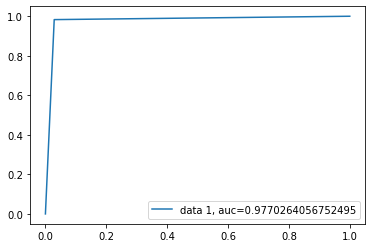

In [311]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<AxesSubplot:>

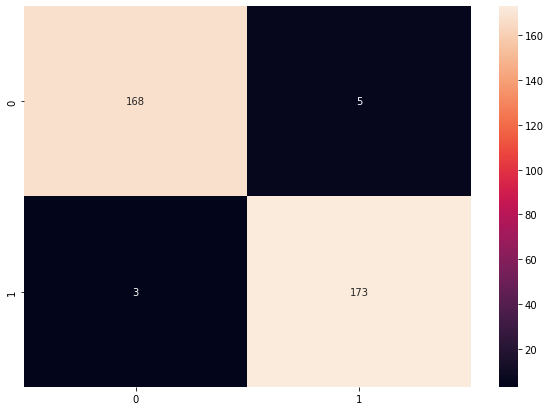

In [312]:
import seaborn as sn
df_cm = pd.DataFrame(confu_matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt = ".20g", annot=True)